<img src="ku_logo_uk.png" alt="drawing" width="130" style="float:right"/>

# <span style="color:#2c061f"> Exercise Class 4 </span>  

<br>

## <span style="color:#374045"> Introduction to Programming and Numerical Analysis </span>


####  <span style="color:#d89216"> <br> Simon Guldager </span>

## Plan for today

1. Plotting
2. Optimization
3. Problem set 1

## Important information

This years inaugural project will be uploaded soon. **Deadline for hand-in is march 20th!**

# 1. Plotting

There exist numerous different modules for plotting in Python. In this course we will work mainly with two of them. The first is the classic tool, `matplotlib`. The second tool is `seaborn` which is a newer module that allows to produce figures with less effort. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Defining af function to plot
We will use the function: 
$$f(x) = sin(x) + 0.05 \cdot x ^ 2 $$


In [2]:
def f(x):
    return np.sin(x) + 0.05 * x ** 2

## 1.2. Generating Data

In [3]:
# generate the data to draw
xs = np.linspace(-10, 10, 100) # evenly space out 100 points between -10 and 10

# xs is a vector, this will apply f(x) to every element in xs
ys = f(xs)

# print first 10 entries (100 is too much)
print(xs[:10])
print(ys[:10])

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818]
[5.54402111 5.16461914 4.77446886 4.38147119 3.99380885 3.61961355
 3.26663527 2.94192697 2.65155782 2.40036626]


## 1.3. Simple plotting

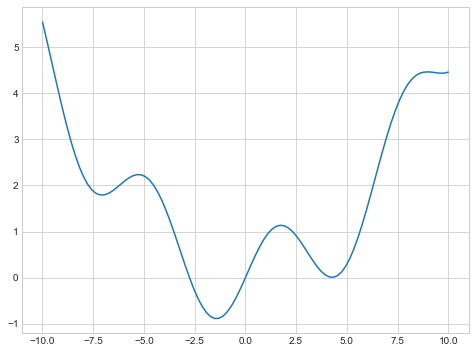

In [4]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(xs, ys)

Plotting to graphs in the same figure

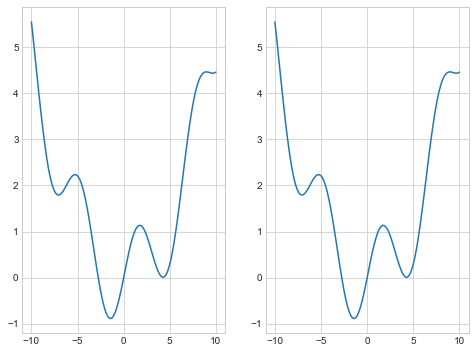

In [5]:
fig = plt.figure(figsize=(8, 6))

# (nrows, ncols, index)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(xs, ys)
ax2.plot(xs, ys)

This is a function displaying the steps in the optimization process

In [6]:
from IPython import display

import time 
plt.rcParams["animation.html"] = "html5"
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def draw_optimization(xs, ys, optmize_xs, bounds = []):
    optmize_xs = [x_guess] + optmize_xs
    optmize_ys = f(np.array(optmize_xs))
    
    sleep_time = 1
    if len(optmize_xs) > 50:
        sleep_time = 0.05
    elif len(optmize_xs) > 10: 
        sleep_time = 0.4
        
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim(-4, 6)
    optmize_xs = np.array(optmize_xs)
    if len(optmize_xs) > 1:
        optmize_xs[optmize_xs > 10] = None
    
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    ax.plot(xs, ys)
    for x_vline in bounds:
        ax.vlines(x_vline,-20,20, linestyles = 'dashed', color = 'black')
    
    for i, x in enumerate(optmize_xs):
        if i == len(optmize_xs) - 1:
            ax.plot(optmize_xs[i], optmize_ys[i], ls = '', marker = 'o', markersize = 10)
        else:
            ax.plot(optmize_xs[i], optmize_ys[i], ls = '', marker = 'o', markersize = 5)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(sleep_time)

Callback function used when drawing the steps in the optimization process 

In [7]:
def callback(xk):
    global optmize_xs
    optmize_xs.append(xk[0])

## 2. Optimization
Let's try to find the global optimum of a function. How can we do this? 
- We can loop through all x's and return optimum 
    - Cumbersome and not guaranteed to yield optimum
- Or we can use Scipy's optimization module
    - We use scipy.optimize.minimize_scalar when we only optimize one argument 
    - For multidimensional functions we use scipy.optimize.minimize
    
    - **Note:** We use minimize even though we solve a maximization problem - just remember to subtract objective function! (multiply with -1)

In [12]:
from scipy import optimize

optmize_xs = []

x_guess = 1
obj = lambda x: f(x)

# I use optimize.minimize here even though we only have one argument to illustrate a point
res = optimize.minimize(obj, x_guess, method='Nelder-Mead', callback = callback)

x_best_scipy = res.x[0]
f_best_scipy = res.fun
num_it = res.nit

print(f'Number of iterations: {num_it}')
print(f'Optimal x:    {x_best_scipy}')
print(f'Optimal f(x): {f_best_scipy}')


Number of iterations: 19
Optimal x:    -1.4275390625000022
Optimal f(x): -0.8878628264855988


## 2.1 What is happening under the hood?
* Largely depends on the method used!
* 'Nelder-Mead' is a downhill method (basically trial-and-error).  
  - Does not always find the optimum, can converge to non stationary points.  
  - However, the algorithm can be used on any function, also functions where derivatives are unknown.
* 'SLSQP' use a lagrangian method to incoorporate constraints - e.g. consumer budget constraint.   
  - This method requires the objective function to twice continuously differentiable.

Let us see the process to the optimum!

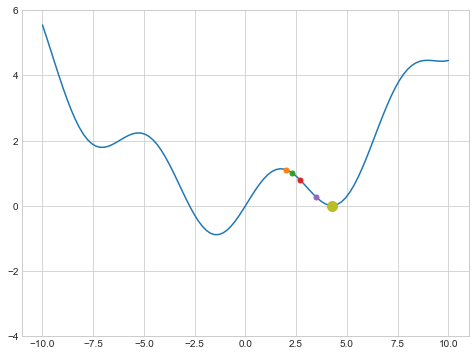

In [9]:
draw_optimization(xs, ys, optmize_xs)

## 2.2 Optimization with constrains and bounds

- Sometimes we want to limit where the optimum is allowed to be, for instance when solving the consumers problem, we can't spend more on goods than our income allows.

In [10]:
optmize_xs = []

x_guess = 0
obj = lambda x: f(x)

bounds = [(-1,5)] # limit of which x's that can be used
constraints = ({'type': 'ineq', 'fun': lambda x: f(x) }) # if the 'fun' is negative the constraint fails 

obj = lambda x: f(x)
res = optimize.minimize(obj, x_guess, method='SLSQP', callback = callback, bounds = bounds)
#res = optimize.minimize(obj, x_guess, method='SLSQP', callback = callback, bounds = bounds, constraints = constraints)

print(f'Number of iterations: {res.nit}')
print(f'Optimal x:    {res.x[0]}')
print(f'Optimal f(x): {res.fun}')

Number of iterations: 2
Optimal x:    -1.0
Optimal f(x): [-0.79147098]


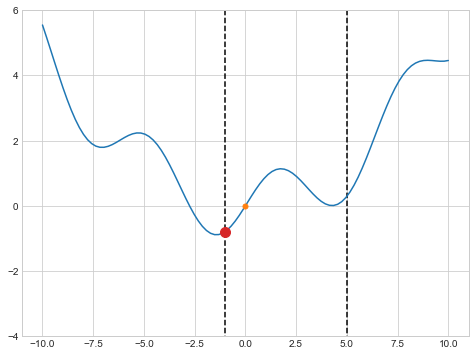

In [11]:
draw_optimization(xs, ys, optmize_xs, bounds[0])

## 2.3 Optimization and solving the consumers problem
- You will see this in the problem set
- The objective function will be the negative utility function (negative because we are minimizing)
- Bounds: Possible values of x1, x2 etc. (they can't be negative, and we can't buy more of one good than we can afford)
- Constraint: We can't spend more on **all goods combined** than we can afford, i.e., total expenditures can't exceed income.
- In the problem set you will solve for more than one x. However, the methodology will be basically the same. (Following the steps of the optimization problem in higher dimensions is not really feassible)